In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Open all images of a certain individual ID

['images', 'frames', 'ids']
(19247, 80, 80)


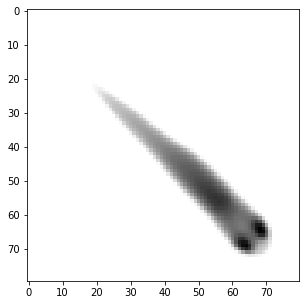

In [2]:
with np.load("Videos/data/video_tracklet_images_single_part0.npz") as npz:
    print(npz.files)
    
    images = npz["images"]  # load images
    ids    = npz["ids"]     # ids have the same length as images
    frames = npz["frames"]  # the frame for each row
    
    # so we can use them as a mask for the images array:
    print(images[ids == 0].shape)
    
    # now draw a median image of this fish. since it is normalized (orientation),
    # it will be a nice, clean picture of what it looks like most of the time.
    # if it does not, then your posture settings are probably off.
    # this only works after successful visual identification + correction of course.
    plt.figure(figsize=(5,5))
    plt.imshow(np.median(images[ids == 0], axis=0), cmap="Greys")
    plt.show()

### Now we want to see that for all individuals
But we are using the meta tracklet pack for this. It contains only one image per consecutive segment.

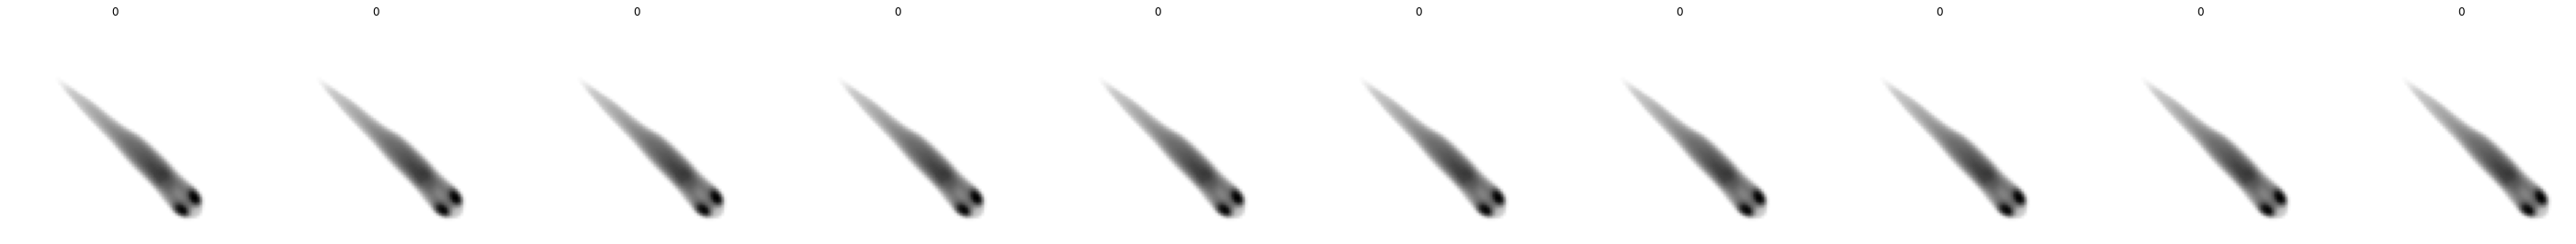

In [3]:
with np.load("Videos/data/video_tracklet_images.npz") as npz:
    meta = npz["meta"]
    N = len(np.unique(meta[:, 0])) # how many fish do we have here?
    
    # plot all individuals in a row. this will probably be real tiny for many more individuals.
    f, axes = plt.subplots(1, N, figsize=(5*N, 5))
    for ax, i in zip(axes, ids):
        ax.axis('off')
        ax.imshow(np.median(npz["images"][npz["meta"][:, 0] == i], axis=0), cmap="Greys")
        ax.set_title(str(i))
    plt.show()

### We can now map from segments (meta) to tracklet images from the big file

In [6]:
for ID, start, end in meta:
    mask = np.logical_and(ids == ID, np.logical_and(frames >= start, frames <= end))
    print(ID, start,"-",end, images[mask].shape)

0 0 - 40 (41, 80, 80)
0 42 - 50 (9, 80, 80)
0 51 - 61 (11, 80, 80)
0 62 - 98 (37, 80, 80)
0 99 - 118 (20, 80, 80)
0 119 - 121 (3, 80, 80)
0 122 - 135 (14, 80, 80)
0 136 - 148 (13, 80, 80)
0 149 - 154 (6, 80, 80)
0 155 - 197 (43, 80, 80)
0 198 - 208 (11, 80, 80)
0 209 - 210 (2, 80, 80)
0 211 - 213 (3, 80, 80)
0 214 - 223 (10, 80, 80)
0 226 - 234 (9, 80, 80)
0 235 - 248 (14, 80, 80)
0 249 - 263 (15, 80, 80)
0 267 - 284 (18, 80, 80)
0 285 - 286 (2, 80, 80)
0 287 - 303 (17, 80, 80)
0 304 - 312 (9, 80, 80)
0 315 - 323 (9, 80, 80)
0 326 - 341 (16, 80, 80)
0 342 - 356 (15, 80, 80)
0 357 - 359 (3, 80, 80)
0 360 - 415 (56, 80, 80)
0 416 - 427 (12, 80, 80)
0 428 - 444 (17, 80, 80)
0 446 - 447 (2, 80, 80)
0 448 - 450 (3, 80, 80)
0 451 - 522 (72, 80, 80)
0 523 - 532 (10, 80, 80)
0 534 - 544 (11, 80, 80)
0 545 - 558 (14, 80, 80)
0 563 - 564 (2, 80, 80)
0 565 - 578 (14, 80, 80)
0 582 - 583 (2, 80, 80)
0 585 - 587 (3, 80, 80)
0 588 - 592 (5, 80, 80)
0 597 - 599 (3, 80, 80)
0 600 - 613 (14, 80, 80)
0 